Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Test/")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/",
    batch_size = 32, image_size = (img_height, img_width), 
    seed = 123, validation_split = 0.2, subset = "training"
)

Found 38239 files belonging to 9 classes.
Using 30592 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/", 
    batch_size = 32, image_size = (img_height, img_width), 
    seed = 123, validation_split = 0.2, subset = "validation"
)

Found 38239 files belonging to 9 classes.
Using 7647 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

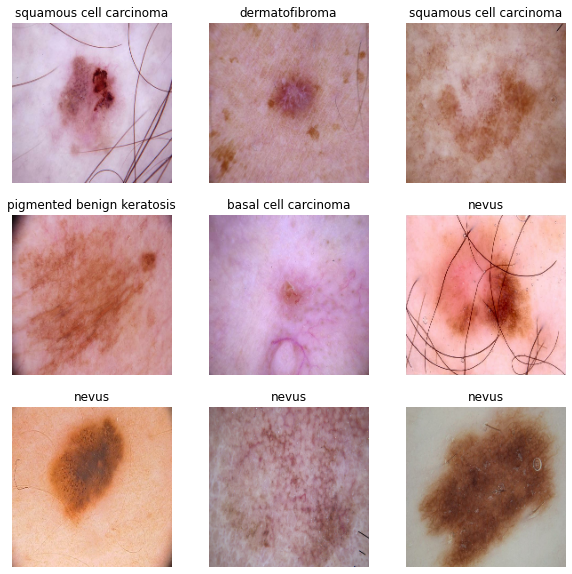

In [ ]:
### your code goes here, you can use training or validation data to visualize

import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),

  layers.Flatten(),
  
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = "softmax")
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 90, 90, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


956/956 [==============================] - 669s 385ms/step - loss: 1.3788 - accuracy: 0.4974 - val_loss: 1.1429 - val_accuracy: 0.5913
Epoch 2/20
956/956 [==============================] - 306s 320ms/step - loss: 0.5842 - accuracy: 0.7807 - val_loss: 0.9741 - val_accuracy: 0.6736
Epoch 3/20
956/956 [==============================] - 310s 325ms/step - loss: 0.3369 - accuracy: 0.8772 - val_loss: 1.1490 - val_accuracy: 0.7004
Epoch 4/20
956/956 [==============================] - 309s 324ms/step - loss: 0.2325 - accuracy: 0.9173 - val_loss: 4.0691 - val_accuracy: 0.4861
Epoch 5/20
956/956 [==============================] - 309s 323ms/step - loss: 0.1970 - accuracy: 0.9293 - val_loss: 0.7186 - val_accuracy: 0.7666
Epoch 6/20
956/956 [==============================] - 308s 322ms/step - loss: 0.1923 - accuracy: 0.9313 - val_loss: 0.7780 - val_accuracy: 0.7756
Epoch 7/20
956/956 [==============================] - 304s 318ms/step - loss: 0.1539 - accuracy: 0.9417 - val_loss: 0.3343 - val_accura

# New section

### Visualizing training results

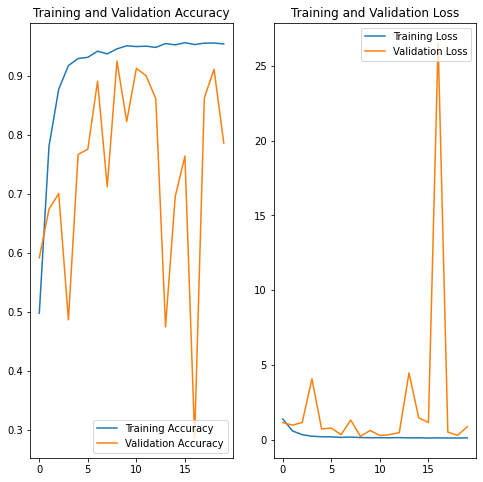

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

- As you can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved only around 60% accuracy on the validation set.
- The plot also shows that due to the large margin between accuracy of training data and validation data the model is overfitted.
- There are multiple ways to fight overfitting in the training process. Here we will use the data augmentation and dropouts for this model.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

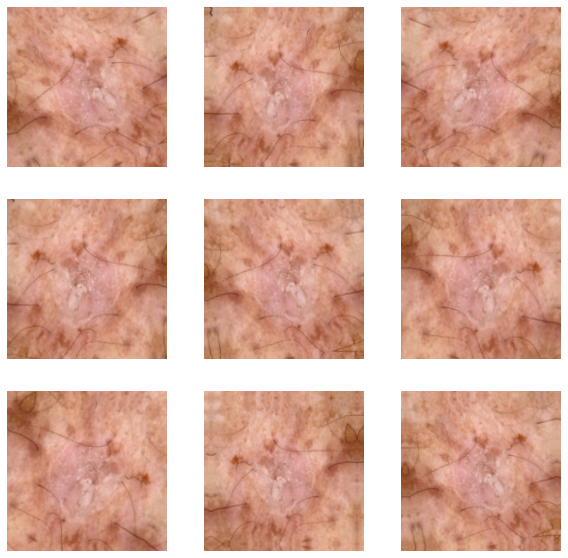

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),

  layers.Flatten(),
  
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = "softmax")
])

### Compiling the model

In [ ]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 180, 180, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 90, 90, 32)       

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
## history = ## your training code


epochs = 20
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


956/956 [==============================] - 326s 340ms/step - loss: 1.6227 - accuracy: 0.4092 - val_loss: 2.5796 - val_accuracy: 0.3246
Epoch 2/20
956/956 [==============================] - 324s 339ms/step - loss: 1.1881 - accuracy: 0.5416 - val_loss: 1.3269 - val_accuracy: 0.5214
Epoch 3/20
956/956 [==============================] - 321s 336ms/step - loss: 1.0199 - accuracy: 0.6082 - val_loss: 1.4736 - val_accuracy: 0.5253
Epoch 4/20
956/956 [==============================] - 323s 337ms/step - loss: 0.9221 - accuracy: 0.6448 - val_loss: 0.9820 - val_accuracy: 0.6416
Epoch 5/20
956/956 [==============================] - 323s 337ms/step - loss: 0.8336 - accuracy: 0.6840 - val_loss: 0.8408 - val_accuracy: 0.6818
Epoch 6/20
956/956 [==============================] - 325s 340ms/step - loss: 0.7782 - accuracy: 0.7087 - val_loss: 0.9019 - val_accuracy: 0.6557
Epoch 7/20
956/956 [==============================] - 323s 338ms/step - loss: 0.7135 - accuracy: 0.7306 - val_loss: 0.9260 - val_accura

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 180, 180, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 90, 90, 32)       

### Visualizing the results

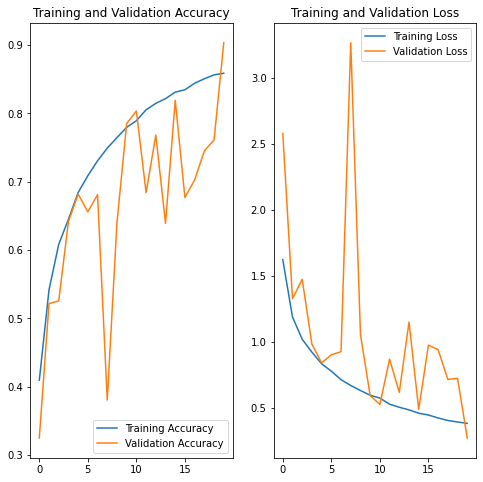

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- As we can observe from above plot after the data augmentation the mrgin between the accuracy of training data and validation data is reduced.
- Model has accuracy around 55 percent for both training and validation data.
- So from above plot we can observe that the issue of overfitting is somewhat in control now.
- We can increase the accuracy for this model by changing in layers, adding data augmentation layer and droputs for preventing from further overfitting.
- Also we can check for class imbalance and if there is any class imbalaced between training data we can handle it by using augmentor so the accuracy of model will increase.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
# get the count of class names by its path for each class.

N = 0 #Total count of number of files in all directories
for dirpath, dirnames, filenames in os.walk(data_dir_train):
    N += len(filenames)
    print("Files in", dirpath, "-" ,len(filenames))
print("Total files", N)

Files in /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train - 0
Files in /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/melanoma - 438
Files in /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/melanoma/output - 4000
Files in /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/seborrheic keratosis - 77
Files in /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/seborrheic keratosis/output - 4000
Files in /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/vascular lesion - 139
Files in /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/vascular lesion/output - 4000
Files in /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/squamous cell carcinoma - 181
Files in /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/squamous cell carcinoma/output -

In [ ]:
# Creating dataframe for class name and its count.

Data = pd.DataFrame({"Class_Name" : ["actinic keratosis", "vascular lesion", "basal cell carcinoma", "melanoma", "squamous cell carcinoma", "nevus", "dermatofibroma", "pigmented benign keratosis", "seborrheic keratosis"],
                     "Class_Count" : [114, 139, 376, 438, 181, 357, 95, 462, 77]})
Data.head()

,Class_Name,Class_Count
0,actinic keratosis,114
1,vascular lesion,139
2,basal cell carcinoma,376
3,melanoma,438
4,squamous cell carcinoma,181


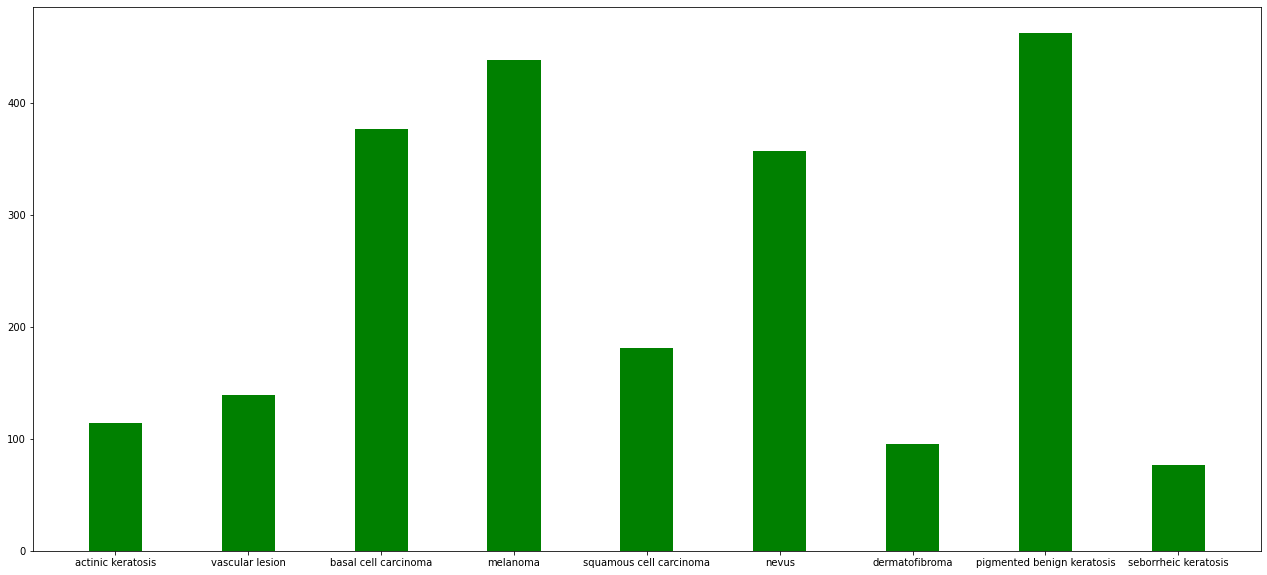

In [ ]:
fig = plt.figure(figsize = (22, 10))
plt.bar(Data.Class_Name, Data.Class_Count, color = "green", width = 0.4)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="/content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCF5BCAC0D0>: 100%|██████████| 500/500 [00:03<00:00, 153.82 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FCF5BE64C50>: 100%|██████████| 500/500 [00:02<00:00, 169.56 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCFEEF17B50>: 100%|██████████| 500/500 [00:02<00:00, 169.43 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FCF6DBEDFD0>: 100%|██████████| 500/500 [00:07<00:00, 64.28 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2314x2067 at 0x7FCF6B326190>: 100%|██████████| 500/500 [00:06<00:00, 77.64 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD139FCE390>: 100%|██████████| 500/500 [00:02<00:00, 173.05 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FD139F3EAD0>: 100%|██████████| 500/500 [00:03<00:00, 139.00 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD139C6CF10>: 100%|██████████| 500/500 [00:03<00:00, 154.45 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD139D60850>: 100%|██████████| 500/500 [00:02<00:00, 177.84 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

40500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/melanoma/output/melanoma_original_ISIC_0010441.jpg_af88af44-6c98-4afe-a511-90eb44b57f28.jpg',
 '/content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/melanoma/output/melanoma_original_ISIC_0000171.jpg_16ea52d3-58c0-401c-9a38-9624eccd16e6.jpg',
 '/content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/melanoma/output/melanoma_original_ISIC_0011128.jpg_fa0dcdd5-81ad-4e0d-8795-5b9892bd001f.jpg',
 '/content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/melanoma/output/melanoma_original_ISIC_0010355.jpg_0d7ab9b1-96c0-401b-a5ab-d31f43296506.jpg',
 '/content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/melanoma/output/melanoma_original_ISIC_0011040.jpg_27bdd252-9ae7-4cd4-a53f-1d22b386dbb6.jpg',
 '/content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/melanoma/output/melanoma_original_ISIC_0000146.jpg

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
original_df = pd.DataFrame(path_list, lesion_list_new)

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

dermatofibroma                4500
melanoma                      4500
basal cell carcinoma          4500
squamous cell carcinoma       4500
seborrheic keratosis          4500
vascular lesion               4500
nevus                         4500
pigmented benign keratosis    4500
actinic keratosis             4500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="/content/gdrive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 42739 files belonging to 9 classes.
Using 34192 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 42739 files belonging to 9 classes.
Using 8547 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
model = Sequential([

  layers.experimental.preprocessing.Rescaling(1./255),
  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),

  layers.Flatten(),
  
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = "softmax")
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:

## Your code goes here, use 50 epochs.


epochs = 30
history = model.fit(
    train_ds,
    validation_data = val_ds, 
    epochs = epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1069/1069 [==============================] - 348s 325ms/step - loss: 1.3451 - accuracy: 0.5298 - val_loss: 1.9308 - val_accuracy: 0.4059
Epoch 2/30
1069/1069 [==============================] - 356s 333ms/step - loss: 0.6763 - accuracy: 0.7499 - val_loss: 1.1606 - val_accuracy: 0.6412
Epoch 3/30
1069/1069 [==============================] - 351s 328ms/step - loss: 0.4691 - accuracy: 0.8280 - val_loss: 0.3769 - val_accuracy: 0.8541
Epoch 4/30
1069/1069 [==============================] - 348s 326ms/step - loss: 0.3531 - accuracy: 0.8704 - val_loss: 0.7968 - val_accuracy: 0.7576
Epoch 5/30
1069/1069 [==============================] - 358s 335ms/step - loss: 0.2891 - accuracy: 0.8952 - val_loss: 0.3627 - val_accuracy: 0.8708
Epoch 6/30
1069/1069 [==============================] - 351s 328ms/step - loss: 0.2572 - accuracy: 0.9057 - val_loss: 0.3093 - val_accuracy: 0.8917
Epoch 7/30
1069/1069 [==============================] - 352s 329ms/step - loss: 0.2451 - accuracy: 0.9127 - val_loss: 14.27

#### **Todo:**  Visualize the model results

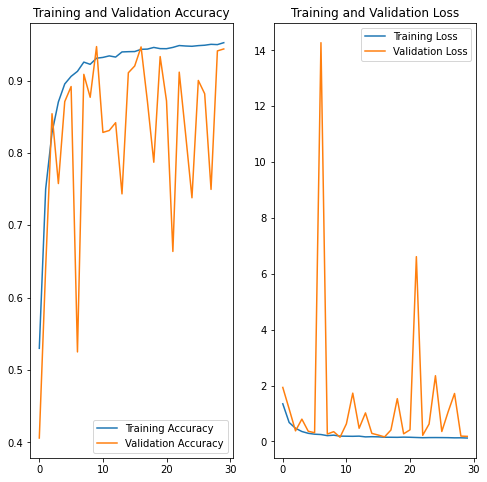

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
# We can conclude the results based on the received outputs which shows the multiple changes in model, its giving more accuracy for both training & validation data.
# According to the above results the model is giving around 90% of accuracy for training data and 80% of accuracy for validation data.
# After we handle the class imbalance and after applying data augmentation and Dropout, there is less overfitting than before, and training and validation accuracy are closer aligned.
# the losses for both training and validation data is decreses.
# This model performs far better than the previous 2 models.